<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/Future_Risk_prediction/DSGP_Data_preprocessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#  Loading the dataset from google drive

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path
file_path = "/content/drive/MyDrive/DSGP/Generated_Import_Statistics_2023.xlsx"

# Load the Excel file
excel_data = pd.ExcelFile(file_path)

# Load data from all sheets and concatenate them into one DataFrame
all_data = pd.concat([excel_data.parse(sheet_name) for sheet_name in excel_data.sheet_names], ignore_index=True)

# Print all 10000 records from all sheets combined
print(f"Total records loaded: {len(all_data)}")



Mounted at /content/drive
Total records loaded: 10000


In [ ]:
# First 5 rows of the dataset
all_data.head()


,IMPORTER,YEAR,MONTH,HSCODE,COUNTRY,UNIT,QUANTITY,VALUE_RS,DESCRIPTION_01,DESCRIPTION_02,DESCRIPTION_03
0,Redwood Chemical Co.,2023,JULY,280110,AUSTRIA,Kg.,11286,10096660,Inorganic chemicals; Organic or inorganic comp...,"Cyanides, cyanide oxides and complex cyanides.",Nitric acid; sulphonitric acids
1,Redwood Chemical Co.,2023,DECEMBER,283719,SPAIN,Kg.,79917,13619760,Inorganic chemicals; Organic or inorganic comp...,"Cyanides, cyanide oxides and complex cyanides.",Nitric acid; sulphonitric acids
2,Greenfield Enterprises,2023,MARCH,280110,GERMANY,Kg.,1741,38229987,Inorganic chemicals; Organic or inorganic comp...,"Cyanides, cyanide oxides and complex cyanides.",Chlorine
3,Prime Logistics Group,2023,NOVEMBER,280800,CHINA,Kg.,171400,16670229,Inorganic chemicals; Organic or inorganic comp...,"Cyanides, cyanide oxides and complex cyanides.",Nitric acid; sulphonitric acids
4,Redwood Chemical Co.,2023,MARCH,280800,SOUTH KOREA,Kg.,130590,25506754,Inorganic chemicals; Organic or inorganic comp...,"Hydrogen peroxide, whether or not solidified w...",Cyanides and cyanide oxides : Of sodium


In [ ]:
# understand the dataset

print ('\n Dataset Information ')
all_data.info()

print ('\n Dataset Statistical Summary  ')
all_data.describe()



 Dataset Information 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IMPORTER        10000 non-null  object
 1   YEAR            10000 non-null  int64 
 2   MONTH           10000 non-null  object
 3   HSCODE          10000 non-null  int64 
 4   COUNTRY         10000 non-null  object
 5   UNIT            10000 non-null  object
 6   QUANTITY        10000 non-null  int64 
 7   VALUE_RS        10000 non-null  int64 
 8   DESCRIPTION_01  10000 non-null  object
 9   DESCRIPTION_02  10000 non-null  object
 10  DESCRIPTION_03  10000 non-null  object
dtypes: int64(4), object(7)
memory usage: 859.5+ KB

 Dataset Statistical Summary  


,YEAR,HSCODE,QUANTITY,VALUE_RS
count,10000.0,10000.000000,10000.000000,1.000000e+04
mean,2023.0,282614.092000,99473.210700,2.520635e+07
std,0.0,1810.162989,57156.755594,1.441738e+07
min,2023.0,280110.000000,1001.000000,1.017680e+05
25%,2023.0,280800.000000,50264.750000,1.276327e+07
50%,2023.0,283711.000000,98558.500000,2.527500e+07
75%,2023.0,283719.000000,148981.500000,3.774728e+07
max,2023.0,284700.000000,199975.000000,4.999840e+07


In [ ]:
# Get the list of numerical columns
numerical_cols = all_data.select_dtypes(include=np.number).columns.tolist()

# Get the list of categorical columns
categorical_cols = all_data.select_dtypes(exclude=np.number).columns.tolist()

# Print the results
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['YEAR', 'HSCODE', 'QUANTITY', 'VALUE_RS']
Categorical Columns: ['IMPORTER', 'MONTH', 'COUNTRY', 'UNIT', 'DESCRIPTION_01', 'DESCRIPTION_02', 'DESCRIPTION_03']


In [ ]:
# Displaying the unique values and their counts relevant to each categorical column
print('\n Categorical colums')

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(all_data[col].value_counts(), "\n")

print('----------------------------------------------------------------------')
print('\n Numarial colums')
# Unique values and their counts relevant to each numerical columns
for col in numerical_cols:
    print(f"\nColumn: {col}")
    print(all_data[col].value_counts(), "\n")


# this step will give an underatanding wheater we have any missing value in other form like empty string , also how many unique values are theere in one col



 Categorical colums

Column: IMPORTER
IMPORTER
Redwood Chemical Co.      2583
Greenfield Enterprises    2501
Prime Logistics Group     2469
TransWorld Chemicals      2447
Name: count, dtype: int64 


Column: MONTH
MONTH
MARCH        873
MAY          873
JUNE         872
APRIL        866
SEPTEMBER    842
DECEMBER     840
JANUARY      838
NOVEMBER     813
AUGUST       809
JULY         800
FEBRUARY     797
OCTOBER      777
Name: count, dtype: int64 


Column: COUNTRY
COUNTRY
INDIA          661
FRANCE         658
THAILAND       650
BANGLADESH     637
SINGAPORE      635
AUSTRIA        631
GERMANY        626
SOUTH KOREA    624
U.S.A          622
JAPAN          621
SPAIN          620
DENMARK        618
U.K.           618
MALAYSIA       611
PAKISTAN       590
CHINA          578
Name: count, dtype: int64 


Column: UNIT
UNIT
Kg.    10000
Name: count, dtype: int64 


Column: DESCRIPTION_01
DESCRIPTION_01
Inorganic chemicals; Organic or inorganic compounds of precious metals    10000
Name: count

In [ ]:
# Calculate minimum, maximum, and average of 'QUANTITY'
min_quantity = all_data['QUANTITY'].min()
max_quantity = all_data['QUANTITY'].max()
avg_quantity = all_data['QUANTITY'].mean()

# Print the results
print(f"Minimum Quantity: {min_quantity}")
print(f"Maximum Quantity: {max_quantity}")
print(f"Average Quantity: {avg_quantity}")

Minimum Quantity: 1001
Maximum Quantity: 199975
Average Quantity: 99473.2107


In [ ]:
# Defining the target variable by combining three columns


# Defining the risk thresholds
high_quantity_threshold = 100000
hazardous_chemicals = [
    "Fluorine, chlorine, bromine and iodine",
    "Cyanides, cyanide oxides and complex cyanides.",
    "Cyanides and cyanide oxides : Of sodium"
]

# Function to classify risk
def classify_risk(row):
    quantity = row['QUANTITY']
    description = row['DESCRIPTION_03']

    if quantity > high_quantity_threshold and description in hazardous_chemicals:
        return "High Risk"
    elif quantity > high_quantity_threshold:
        return "Moderate Risk"
    else:
        return "Low Risk"

# Applying the function to create a new column
all_data['Risk_Level'] = all_data.apply(classify_risk, axis=1)

# Displaying the dataset
all_data.head()

,IMPORTER,YEAR,MONTH,HSCODE,COUNTRY,UNIT,QUANTITY,VALUE_RS,DESCRIPTION_01,DESCRIPTION_02,DESCRIPTION_03,Risk_Level
0,Redwood Chemical Co.,2023,JULY,280110,AUSTRIA,Kg.,11286,10096660,Inorganic chemicals; Organic or inorganic comp...,"Cyanides, cyanide oxides and complex cyanides.",Nitric acid; sulphonitric acids,Low Risk
1,Redwood Chemical Co.,2023,DECEMBER,283719,SPAIN,Kg.,79917,13619760,Inorganic chemicals; Organic or inorganic comp...,"Cyanides, cyanide oxides and complex cyanides.",Nitric acid; sulphonitric acids,Low Risk
2,Greenfield Enterprises,2023,MARCH,280110,GERMANY,Kg.,1741,38229987,Inorganic chemicals; Organic or inorganic comp...,"Cyanides, cyanide oxides and complex cyanides.",Chlorine,Low Risk
3,Prime Logistics Group,2023,NOVEMBER,280800,CHINA,Kg.,171400,16670229,Inorganic chemicals; Organic or inorganic comp...,"Cyanides, cyanide oxides and complex cyanides.",Nitric acid; sulphonitric acids,Moderate Risk
4,Redwood Chemical Co.,2023,MARCH,280800,SOUTH KOREA,Kg.,130590,25506754,Inorganic chemicals; Organic or inorganic comp...,"Hydrogen peroxide, whether or not solidified w...",Cyanides and cyanide oxides : Of sodium,High Risk


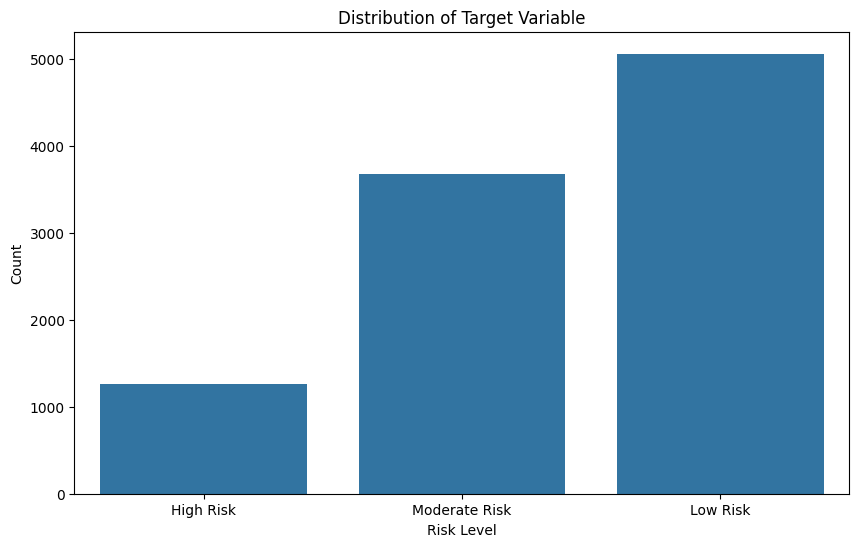

In [ ]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=all_data, x='Risk_Level', order=['High Risk', 'Moderate Risk', 'Low Risk'])
plt.xticks(rotation=0)  # Ensures the labels are horizontal
plt.title('Distribution of Target Variable')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

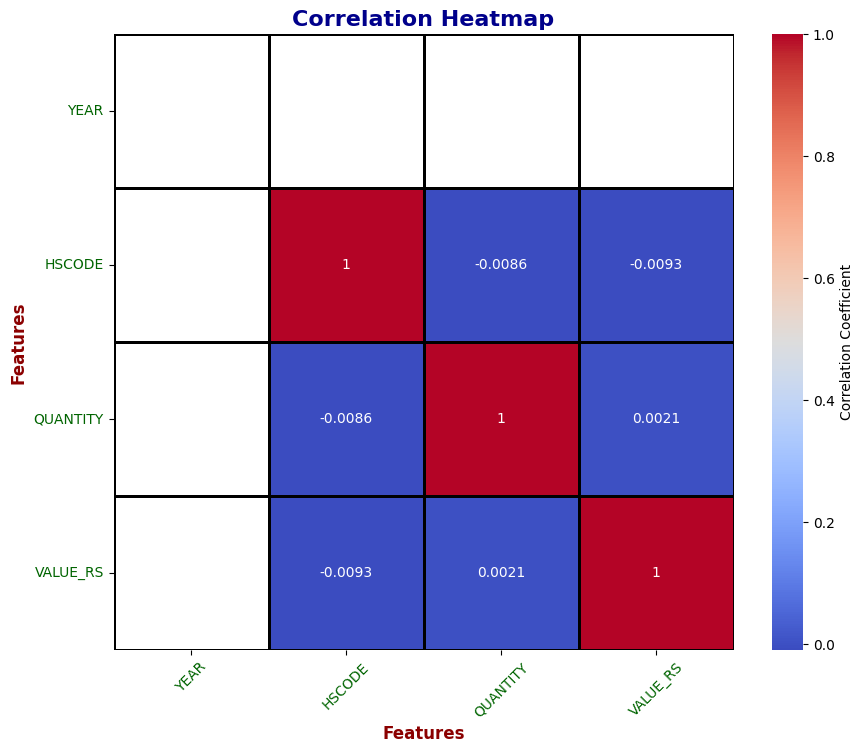

In [ ]:
# List of numerical columns  = numerical_cols

# Visualizing the correlation heatmap for the numerical columns
plt.figure(figsize=(10, 8))

# The Correlation Heatmap
sns.heatmap(
    all_data[numerical_cols].corr(),
    annot=True,
    cmap='coolwarm',
    cbar_kws={'label': 'Correlation Coefficient'},
    linewidths=1,
    linecolor='black'
)

# Adding title and labels with formatting
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Features', fontsize=12, fontweight='bold', color='darkred')
plt.ylabel('Features', fontsize=12, fontweight='bold', color='darkred')

# Customizing tick labels for better readability
plt.xticks(fontsize=10, rotation=45, color='darkgreen')
plt.yticks(fontsize=10, rotation=0, color='darkgreen')

# Display the heatmap
plt.show()

In [ ]:
# handling miss values

# Replace "unkown" with NaN in all columns
all_data = all_data.replace("unkown", np.nan)

# understand the dataset, to identify any missing data in anyother form

for column in all_data.columns:
    unique_values = all_data[column].unique()
    print(f"\n Unique values in column \n'{column}': {unique_values}")

#print the number of missing values
print()
print(all_data.isnull().sum())

# since there is now missing values we can move on

# Droping these col because it has the same value kg and 2023
all_data = all_data.drop(['UNIT', 'YEAR'], axis=1)





 Unique values in column 
'IMPORTER': ['Redwood Chemical Co.' 'Greenfield Enterprises' 'Prime Logistics Group'
 'TransWorld Chemicals']

 Unique values in column 
'YEAR': [2023]

 Unique values in column 
'MONTH': ['JULY' 'DECEMBER' 'MARCH' 'NOVEMBER' 'AUGUST' 'OCTOBER' 'MAY' 'JUNE'
 'SEPTEMBER' 'FEBRUARY' 'APRIL' 'JANUARY']

 Unique values in column 
'HSCODE': [280110 283719 280800 283711 284700]

 Unique values in column 
'COUNTRY': ['AUSTRIA' 'SPAIN' 'GERMANY' 'CHINA' 'SOUTH KOREA' 'MALAYSIA' 'THAILAND'
 'PAKISTAN' 'SINGAPORE' 'DENMARK' 'U.S.A' 'INDIA' 'JAPAN' 'BANGLADESH'
 'FRANCE' 'U.K.']

 Unique values in column 
'UNIT': ['Kg.']

 Unique values in column 
'QUANTITY': [ 11286  79917   1741 ... 161189 171418  91712]

 Unique values in column 
'VALUE_RS': [10096660 13619760 38229987 ... 28993176 47974241 42892391]

 Unique values in column 
'DESCRIPTION_01': ['Inorganic chemicals; Organic or inorganic compounds of precious metals']

 Unique values in column 
'DESCRIPTION_02': ['Cy

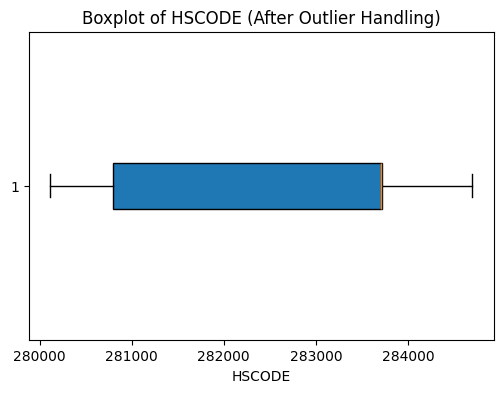

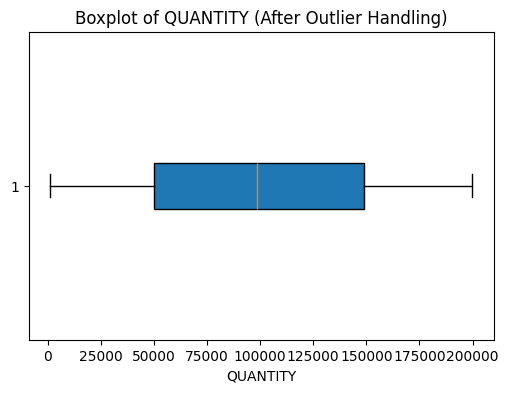

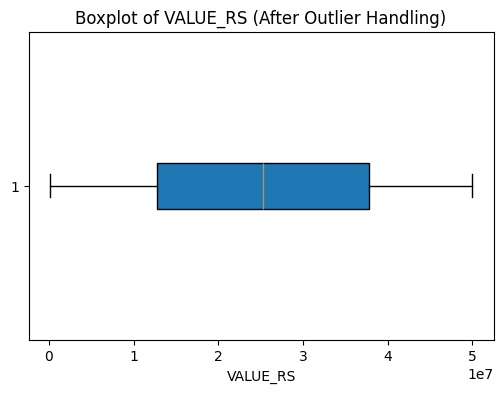

In [ ]:
# handling Outlier

# Create box plots after outlier handling
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(all_data[col], vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col} (After Outlier Handling)")
    plt.xlabel(col)
    plt.show()


for column in numerical_cols:
    Q1 = all_data[column].quantile(0.25)
    Q3 = all_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median
    median = all_data[column].median()
    all_data[column] = np.where((all_data[column] < lower_bound) | (all_data[column] > upper_bound), median, all_data[column])



In [ ]:
# Encoding Categorical variables
# Perform one-hot encoding for categorical columns

all_data = pd.get_dummies(all_data, columns=categorical_cols, prefix=categorical_cols, prefix_sep='_', drop_first=True)

# Displaying the encoded data
print('\nEncoded data\n')
all_data.head()




Encoded data



,HSCODE,QUANTITY,VALUE_RS,IMPORTER_Prime Logistics Group,IMPORTER_Redwood Chemical Co.,IMPORTER_TransWorld Chemicals,MONTH_AUGUST,MONTH_DECEMBER,MONTH_FEBRUARY,MONTH_JANUARY,...,COUNTRY_SPAIN,COUNTRY_THAILAND,COUNTRY_U.K.,COUNTRY_U.S.A,"DESCRIPTION_02_Fluorine, chlorine, bromine and iodine","DESCRIPTION_02_Hydrogen peroxide, whether or not solidified with urea.",DESCRIPTION_02_Nitric acid; sulphonitric acids.,DESCRIPTION_03_Cyanides and cyanide oxides : Of sodium,"DESCRIPTION_03_Hydrogen peroxide, whether or not solidified with urea.",DESCRIPTION_03_Nitric acid; sulphonitric acids
0,280110.0,11286.0,10096660.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,283719.0,79917.0,13619760.0,False,True,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
2,280110.0,1741.0,38229987.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,280800.0,171400.0,16670229.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,280800.0,130590.0,25506754.0,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [ ]:
# normalize/ Standardize the numarial features

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your numerical data and transform it
all_data[numerical_cols] = scaler.fit_transform(all_data[numerical_cols])


In [ ]:
print("Available Columns:", all_data.columns)

Available Columns: Index(['HSCODE', 'QUANTITY', 'VALUE_RS', 'IMPORTER_Prime Logistics Group',
       'IMPORTER_Redwood Chemical Co.', 'IMPORTER_TransWorld Chemicals',
       'MONTH_AUGUST', 'MONTH_DECEMBER', 'MONTH_FEBRUARY', 'MONTH_JANUARY',
       'MONTH_JULY', 'MONTH_JUNE', 'MONTH_MARCH', 'MONTH_MAY',
       'MONTH_NOVEMBER', 'MONTH_OCTOBER', 'MONTH_SEPTEMBER',
       'COUNTRY_BANGLADESH', 'COUNTRY_CHINA', 'COUNTRY_DENMARK',
       'COUNTRY_FRANCE', 'COUNTRY_GERMANY', 'COUNTRY_INDIA', 'COUNTRY_JAPAN',
       'COUNTRY_MALAYSIA', 'COUNTRY_PAKISTAN', 'COUNTRY_SINGAPORE',
       'COUNTRY_SOUTH KOREA', 'COUNTRY_SPAIN', 'COUNTRY_THAILAND',
       'COUNTRY_U.K.', 'COUNTRY_U.S.A',
       'DESCRIPTION_02_Fluorine, chlorine, bromine and iodine',
       'DESCRIPTION_02_Hydrogen peroxide, whether or not solidified with urea.',
       'DESCRIPTION_02_Nitric acid; sulphonitric acids.',
       'DESCRIPTION_03_Cyanides and cyanide oxides : Of sodium',
       'DESCRIPTION_03_Hydrogen peroxide, wheth

In [ ]:
# Step 3: Combine chemical descriptions for risk level assignment
description_columns = ['DESCRIPTION_02_Fluorine, chlorine, bromine and iodine',
       'DESCRIPTION_02_Hydrogen peroxide, whether or not solidified with urea.',
       'DESCRIPTION_02_Nitric acid; sulphonitric acids.',
       'DESCRIPTION_03_Cyanides and cyanide oxides : Of sodium',
       'DESCRIPTION_03_Hydrogen peroxide, whether or not solidified with urea.',
       'DESCRIPTION_03_Nitric acid; sulphonitric acids']

# Verify if all description columns exist in the dataset
existing_columns = [col for col in description_columns if col in all_data.columns]

if not existing_columns:
    raise ValueError("None of the specified description columns exist in the dataset!")

# Combine existing description columns into one
all_data['combined_description'] = all_data[existing_columns].fillna('').agg(' '.join, axis=1)


def assign_risk_level(description):
    description = description.lower()
    high_risk_chemicals = ['cyanides', 'fluorine', 'bromine', 'iodine']
    medium_risk_chemicals = ['hydrogen peroxide', 'nitric acid', 'sulphonitric acids']
    if any(chem in description for chem in high_risk_chemicals):
        return 'High'
    elif any(chem in description for chem in medium_risk_chemicals):
        return 'Medium'
    else:
        return 'Low'


# Apply the function to create a risk_level column
all_data['risk_level'] = all_data['combined_description'].apply(assign_risk_level)

print("\nRisk Level Distribution:")
print(all_data['risk_level'].value_counts())



Risk Level Distribution:
risk_level
Low    10000
Name: count, dtype: int64
